# Multiple Linear Regression in Statsmodels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on our Boston Housing Data set!

## Objectives
You will be able to:
* Run linear regression on Boston Housing dataset with all the predictors
* Interpret the parameters of the multiple linear regression model

## The Boston Housing Data

We pre-processed the Boston Housing Data again. This time, however, we did things slightly different:
- We dropped "ZN" and "NOX" completely
- We categorized "RAD" in 3 bins and "TAX" in 4 bins
- We used min-max-scaling on "B", "CRIM" and "DIS" (and logtransformed all of them first, except "B")
- We used standardization on "AGE", "INDUS", "LSTAT" and "PTRATIO" (and logtransformed all of them first, except for "AGE") 

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_features = boston_features.drop(["NOX","ZN"],axis=1)

# first, create bins for based on the values observed. 3 values will result in 2 bins
bins = [0,6,  24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# first, create bins for based on the values observed. 4 values will result in 3 bins
bins = [0, 270, 360, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix="TAX")
rad_dummy = pd.get_dummies(bins_rad, prefix="RAD")
boston_features = boston_features.drop(["RAD","TAX"], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)

In [2]:
age = boston_features["AGE"]
b = boston_features["B"]
logcrim = np.log(boston_features["CRIM"])
logdis = np.log(boston_features["DIS"])
logindus = np.log(boston_features["INDUS"])
loglstat = np.log(boston_features["LSTAT"])
logptratio = np.log(boston_features["PTRATIO"])

# minmax scaling
boston_features["B"] = (b-min(b))/(max(b)-min(b))
boston_features["CRIM"] = (logcrim-min(logcrim))/(max(logcrim)-min(logcrim))
boston_features["DIS"] = (logdis-min(logdis))/(max(logdis)-min(logdis))

#standardization
boston_features["AGE"] = (age-np.mean(age))/np.sqrt(np.var(age))
boston_features["INDUS"] = (logindus-np.mean(logindus))/np.sqrt(np.var(logindus))
boston_features["LSTAT"] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))
boston_features["PTRATIO"] = (logptratio-np.mean(logptratio))/(np.sqrt(np.var(logptratio)))

## Run an linear model in Statsmodels

In [4]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [20]:
Y = pd.DataFrame(boston.target, columns=['price'])
Y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [21]:
X = sm.add_constant(boston_features)
X.head()

,const,CRIM,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(0, 6]","RAD_(6, 24]","TAX_(0, 270]","TAX_(270, 360]","TAX_(360, 712]"
0,1.0,0.000000,-1.704344,0.0,6.575,-0.120013,0.542096,-1.443977,1.000000,-1.275260,1,0,0,1,0
1,1.0,0.153211,-0.263239,0.0,6.421,0.367166,0.623954,-0.230278,1.000000,-0.263711,1,0,1,0,0
2,1.0,0.153134,-0.263239,0.0,7.185,-0.265812,0.623954,-0.230278,0.989737,-1.627858,1,0,1,0,0
3,1.0,0.171005,-1.778965,0.0,6.998,-0.809889,0.707895,0.165279,0.994276,-2.153192,1,0,1,0,0
4,1.0,0.250315,-1.778965,0.0,7.147,-0.511180,0.707895,0.165279,1.000000,-1.162114,1,0,1,0,0


In [23]:
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     144.9
Date:                Sun, 05 May 2019   Prob (F-statistic):          5.08e-153
Time:                        16:40:40   Log-Likelihood:                -1458.2
No. Observations:                 506   AIC:                             2942.
Df Residuals:                     493   BIC:                             2997.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.4607      1.789      2.493      0.013       0.946       7.976
CRIM              -1.9538      2.115     -0.924      0.356      -6.110       2.202
INDUS             -0.8046      0.362     -2.220      0.027      -1.517      -0.093
CHAS               2.5959      0.796      3.260      0.001       1.032       4.160
RM                 2.6466      0.408      6.488      0.000       1.845       3.448
AGE                0.0794      0.352      0.226      0.821      -0.612       0.770
DIS              -10.0962      1.856     -5.439      0.000     -13.743      -6.449
PTRATIO           -1.4867      0.241     -6.160      0.000      -1.961      -1.013
B                  3.8412      0.986      3.897      0.000       1.905       5.778
LSTAT             -5.6288      0.354    -15.912      0.000      -6.324      -4.934
RAD_(0, 6]         1.5613      0.821      1.901      0.058      -0.052       3.175
RAD_(6, 24]        2.8993      1.073      2.701      0.007       0.791       5.008
TAX_(0, 270]       2.6222      0.716      3.665      0.000       1.216       4.028
TAX_(270, 360]     1.3624      0.704      1.936      0.053      -0.020       2.745
TAX_(360, 712]     0.4761      0.684      0.696      0.487      -0.868       1.820
==============================================================================
Omnibus:                      106.730   Durbin-Watson:                   1.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.101
Skew:                           0.891   Prob(JB):                     1.48e-94
Kurtosis:                       7.162   Cond. No.                     5.67e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.79e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Run the same model in Scikit-learn

In [24]:
from sklearn.linear_model import LinearRegression


In [26]:

linreg = LinearRegression()
linreg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
print(linreg.coef_)
print(linreg.intercept_)


[[  0.          -1.95380233  -0.80457549   2.59586776   2.64657111
    0.07939727 -10.09618465  -1.48666599   3.8412139   -5.62879369
   -0.66898159   0.66898159   1.13527933  -0.12449679  -1.01078255]]
[8.17785839]


## Remove the necessary variables to make sure the coefficients are the same for Scikit-learn vs Statsmodels

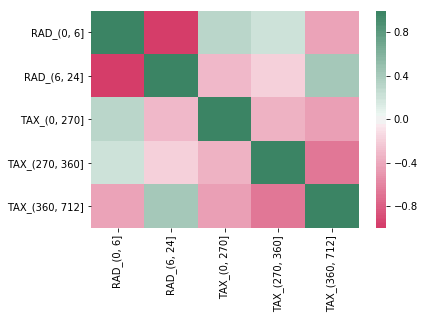

In [54]:
import seaborn as sns
graph_df = X.iloc[:, 10:20]
sns.heatmap(graph_df.corr(), center=0, cmap=sns.diverging_palette(0, 150, l=50, n=100, center="light"));

In [57]:
graph_df.corr()

,"RAD_(0, 6]","RAD_(6, 24]","TAX_(0, 270]","TAX_(270, 360]","TAX_(360, 712]"
"RAD_(0, 6]",1.000000,-1.000000,0.313475,0.197267,-0.437485
"RAD_(6, 24]",-1.000000,1.000000,-0.313475,-0.197267,0.437485
"TAX_(0, 270]",0.313475,-0.313475,1.000000,-0.357047,-0.455635
"TAX_(270, 360]",0.197267,-0.197267,-0.357047,1.000000,-0.668809
"TAX_(360, 712]",-0.437485,0.437485,-0.455635,-0.668809,1.000000


In [70]:
X_adjusted = X.drop(["RAD_(0, 6]", "TAX_(360, 712]"], axis=1)
X_adjusted.head()

,const,CRIM,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(6, 24]","TAX_(0, 270]","TAX_(270, 360]"
0,1.0,0.000000,-1.704344,0.0,6.575,-0.120013,0.542096,-1.443977,1.000000,-1.275260,0,0,1
1,1.0,0.153211,-0.263239,0.0,6.421,0.367166,0.623954,-0.230278,1.000000,-0.263711,0,1,0
2,1.0,0.153134,-0.263239,0.0,7.185,-0.265812,0.623954,-0.230278,0.989737,-1.627858,0,1,0
3,1.0,0.171005,-1.778965,0.0,6.998,-0.809889,0.707895,0.165279,0.994276,-2.153192,0,1,0
4,1.0,0.250315,-1.778965,0.0,7.147,-0.511180,0.707895,0.165279,1.000000,-1.162114,0,1,0


### Statsmodels

In [71]:
model2 = sm.OLS(Y, X_adjusted).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     144.9
Date:                Sun, 05 May 2019   Prob (F-statistic):          5.08e-153
Time:                        17:04:49   Log-Likelihood:                -1458.2
No. Observations:                 506   AIC:                             2942.
Df Residuals:                     493   BIC:                             2997.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              6.4981      3.153      2.061      0.040       0.303      12.693
CRIM              -1.9538      2.115     -0.924      0.356      -6.110       2.202
INDUS             -0.8046      0.362     -2.220      0.027      -1.517      -0.093
CHAS               2.5959      0.796      3.260      0.001       1.032       4.160
RM                 2.6466      0.408      6.488      0.000       1.845       3.448
AGE                0.0794      0.352      0.226      0.821      -0.612       0.770
DIS              -10.0962      1.856     -5.439      0.000     -13.743      -6.449
PTRATIO           -1.4867      0.241     -6.160      0.000      -1.961      -1.013
B                  3.8412      0.986      3.897      0.000       1.905       5.778
LSTAT             -5.6288      0.354    -15.912      0.000      -6.324      -4.934
RAD_(6, 24]        1.3380      0.672      1.990      0.047       0.017       2.659
TAX_(0, 270]       2.1461      0.704      3.047      0.002       0.762       3.530
TAX_(270, 360]     0.8863      0.607      1.459      0.145      -0.307       2.080
==============================================================================
Omnibus:                      106.730   Durbin-Watson:                   1.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              432.101
Skew:                           0.891   Prob(JB):                     1.48e-94
Kurtosis:                       7.162   Cond. No.                         117.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Scikit-learn

In [72]:
linreg2 = LinearRegression()
linreg2.fit(X_adjusted, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [73]:
print(linreg2.coef_)
print(linreg2.intercept_)

[[  0.          -1.95380233  -0.80457549   2.59586776   2.64657111
    0.07939727 -10.09618465  -1.48666599   3.8412139   -5.62879369
    1.33796317   2.14606188   0.88628576]]
[6.49809426]


## Interpret the coefficients for PTRATIO, PTRATIO, LSTAT

- CRIM: per capita crime rate by town
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population

## Predict the house price given the following characteristics (before manipulation!!)

Make sure to transform your variables as needed!

- CRIM: 0.15
- INDUS: 6.07
- CHAS: 1        
- RM:  6.1
- AGE: 33.2
- DIS: 7.6
- PTRATIO: 17
- B: 383
- LSTAT: 10.87
- RAD: 8
- TAX: 284

## Summary
Congratulations! You've fitted your first multiple linear regression model on the Boston Housing Data.